# GoogLeNet (Inception v3) 응용하기

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [2]:
inceptionv3 = InceptionV3(input_shape=(299,299,3))
inceptionv3.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [6]:
import numpy as np
import cv2
import time 

img = cv2.imread('animals/cat.jpg', -1)
img = cv2.resize(img, (299, 299))

start = time.time() 
yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))
time = time.time() - start
# label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]

테스트 시 소요 시간 : 0.2877664566040039
saltshaker (84.81%)


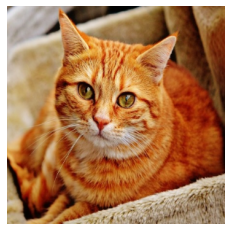

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.imshow(img)
plt.axis("off")
plt.show()

flatworm (100.00%)


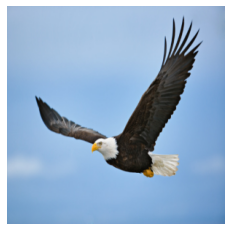

In [10]:
img = cv2.imread('animals/eagle.jpg', -1)
img = cv2.resize(img, (299, 299))

yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))
label = decode_predictions(yhat)
label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.imshow(img)
plt.axis("off")
plt.show()